<a href="https://colab.research.google.com/github/Oussamayousre/DLL/blob/version_2/drowsiness_project/Drowsiness_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!git clone https://github.com/rezaghoddoosian/Early-Drowsiness-Detection.git

fatal: destination path 'Early-Drowsiness-Detection' already exists and is not an empty directory.


In [ ]:
!cp -r /content/Early-Drowsiness-Detection /content/gdrive/MyDrive

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets ,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import numpy as np

data = np.load('/content/gdrive/MyDrive/Early-Drowsiness-Detection/Labels_30_Fold1.npy')

In [ ]:
data.shape

(7379, 1)

In [ ]:
arr = np.array([]).reshape(0,4)
for i in range(1,6) : 
  data = np.load(f'/content/Early-Drowsiness-Detection/Blinks_30_Fold{i}.npy')
  for i in range(len(data)) : 
    arr = np.vstack([arr, data[i]])
  arr.shape


In [ ]:
arr = np.array([]).reshape(0,1)
for i in range(1,6) : 
  data = np.load(f'/content/gdrive/MyDrive/Early-Drowsiness-Detection/Labels_30_Fold{i}.npy')
  for i in range(len(data)) : 
    arr = np.vstack([arr, np.full((30,1), data[i])])
  arr.shape

In [ ]:
arr.shape

(1037760, 1)

In [ ]:
np.save('/content/gdrive/MyDrive/label_blink.npy', arr) # save


In [ ]:
X_test_set = np.load("/content/gdrive/MyDrive/test_blink.npy")
y_test_set = np.load("/content/gdrive/MyDrive/label_test_blink.npy")
train_dataset = np.load("/content/gdrive/MyDrive/train_blink.npy")
y_Data = np.load("/content/gdrive/MyDrive/label_blink.npy")
validation_dataset = (np.load("/content/gdrive/MyDrive/val_blink.npy"),np.load("/content/gdrive/MyDrive/labelval_blink.npy"))
print(train_dataset.shape)
print(y_Data.shape)
y_Data.shape

(1037760, 4)
(1037760, 1)


(1037760, 1)

In [ ]:
y_Data = y_Data.reshape(y_Data.shape[0]).astype(int)
y_test_set = y_test_set.reshape(y_test_set.shape[0]).astype(int)
y_Data

array([10, 10, 10, ...,  5,  5,  5])

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets ,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
model = models.Sequential([
          layers.Dense(512,activation='relu'),
          layers.Dense(256,activation='relu'),
          layers.Dense(128,activation='relu'),
          layers.Dense(64,activation='relu'),
          layers.Dense(32,activation='relu'),
          layers.Dense(16,activation='relu'),
          layers.Dense(11,activation='softmax'),

])
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=opt,
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
history = model.fit(x = train_dataset,y = y_Data , validation_data=validation_dataset, epochs = 32 ,batch_size = 512 , shuffle=True)
history


Epoch 1/32
2027/2027 [==============================] - 57s 27ms/step - loss: 0.7855 - accuracy: 0.6162 - val_loss: 0.7774 - val_accuracy: 0.6345
Epoch 2/32
2027/2027 [==============================] - 56s 28ms/step - loss: 0.7127 - accuracy: 0.6676 - val_loss: 0.7296 - val_accuracy: 0.6605
Epoch 3/32
2027/2027 [==============================] - 57s 28ms/step - loss: 0.6670 - accuracy: 0.6926 - val_loss: 0.6739 - val_accuracy: 0.6951
Epoch 4/32
2027/2027 [==============================] - 57s 28ms/step - loss: 0.6227 - accuracy: 0.7162 - val_loss: 0.6294 - val_accuracy: 0.7171
Epoch 5/32
2027/2027 [==============================] - 58s 29ms/step - loss: 0.5803 - accuracy: 0.7389 - val_loss: 0.5658 - val_accuracy: 0.7552
Epoch 6/32
2027/2027 [==============================] - 57s 28ms/step - loss: 0.5380 - accuracy: 0.7610 - val_loss: 0.5468 - val_accuracy: 0.7646
Epoch 7/32
2027/2027 [==============================] - 58s 28ms/step - loss: 0.5003 - accuracy: 0.7799 - val_loss: 0.5062 -

In [ ]:
print("Evaluate on test data")
results = model.evaluate(x = X_test_set , y = y_test_set )
print("test loss, test acc:", results)
print("Accuracy of the model is - " , results[1]*100 , "%")

Evaluate on test data
2956/2956 [==============================] - 11s 3ms/step - loss: 0.1695 - accuracy: 0.9303
test loss, test acc: [0.16946080327033997, 0.9302991628646851]
Accuracy of the model is -  93.0299162864685 %


In [ ]:


#p =model.predict(r)
#for i in range(len(p)) : 
#  print(np.argmax(p[i]))
model.save("/content/gdrive/MyDrive")


INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/assets


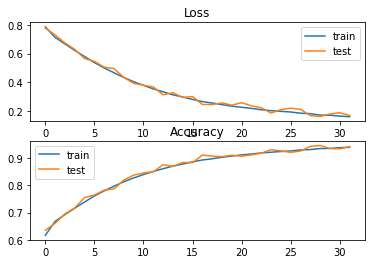

In [ ]:
from matplotlib import pyplot

# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(train_dataset, y_Data)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
neigh.score(X_test_set,y_test_set)

0.9996299820276985

In [ ]:
neigh.score(validation_dataset[0], validation_dataset[1])

0.9982328733962721

## Real Time Detection

In [ ]:
from google.colab.patches import cv2_imshow
from scipy.spatial import distance as dist
from imutils.video import FileVideoStream
from scipy.signal import argrelextrema
from imutils.video import VideoStream
from imutils import face_utils
import numpy as np
import argparse
import imutils
import time
import dlib
import cv2
import os

In [ ]:
def eye_aspect_ratio(eye):
	# compute the euclidean distances between the two sets of
	# vertical eye landmarks (x, y)-coordinates
	A = dist.euclidean(eye[1], eye[5])
	B = dist.euclidean(eye[2], eye[4])
	# compute the euclidean distance between the horizontal
	# eye landmark (x, y)-coordinates
	C = dist.euclidean(eye[0], eye[3])
	# compute the eye aspect ratio
	ear = (A + B) / (2.0 * C)
	# return the eye aspect ratio
	return ear


def start_check(blink_index_list, ear) :
  start = np.array([] , dtype=np.int64)
  Bool = True 
  for i in blink_index_list : 
    Bool = True 
    j = i -1
    while Bool and  j > 0 : 
      if ear[j] <= ear[j-1]  :
        j -= 1
      else : 
        start = np.append(start,j)
        Bool = False 
    #this condition is to make sure that we can save the end value even if it is that last value , since in the while condition
    #we're going to stop before the last value to avoid the index out of bounds error
    if j == 0 : 
      start  = np.append(start , j)
  return start 

def end_check(blink_index_list, ear) :
  
  end = np.array([] , dtype=np.int64)
  Bool = True 
  for i in blink_index_list : 
    Bool = True 
    j = i+1 

    while Bool and j< len(ear)-1 : 
      if ear[j] <= ear[j+1] :

        j += 1
      else : 
        end  = np.append(end , j)
        Bool = False 
    #this condition is to make sure that we can save the end value even if it is that last value , since in the while condition
    #we're going to stop before the last value to avoid the index out of bounds error
    if j == len(ear)-1 : 
      end  = np.append(end , j)
      
  return end  

In [ ]:
EYE_AR_THRESH = 0.3
EYE_AR_CONSEC_FRAMES = 3
train_blink_Final_1 = np.array([]).reshape(0,4)
labels_blink_Final_1 =  np.array([]).reshape(0,1)
# initialize the frame counters and the total number of blinks
COUNTER = 0
TOTAL = 0
EAR = []
i = 0

In [ ]:
!wget   http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2

--2021-08-03 23:55:33--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2.7’

shape_predictor_68_ 100%[===================>]  61.07M  30.0MB/s    in 2.0s    

2021-08-03 23:55:35 (30.0 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2.7’ saved [64040097/64040097]



In [ ]:
!bunzip2 /content/shape_predictor_68_face_landmarks.dat.bz2

datFile =  "/content/shape_predictor_68_face_landmarks.dat"

bunzip2: Output file /content/shape_predictor_68_face_landmarks.dat already exists.


In [ ]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(datFile)


In [ ]:
(lStart, lEnd) = face_utils.FACIAL_LANDMARKS_IDXS["left_eye"]
(rStart, rEnd) = face_utils.FACIAL_LANDMARKS_IDXS["right_eye"]

In [ ]:
time.sleep(1.0)
#cv2.VideoCapture(0)

In [ ]:
from google.colab.patches import cv2_imshow
vs = cv2.VideoCapture("/content/gdrive/MyDrive/DataBase/Fold1_part1/01/0.mov")
while True :
    ret, frame = vs.read()
    if ret == False:
        break 
    frame = imutils.resize(frame, width=450)
 #   cv2_imshow(frame)

    #frame = cv2.resize(frame, dim, interpolation = cv2.INTER_AREA)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # detect faces in the grayscale frame
    rects = detector(gray, 0)
    print(rects)
    for rect in rects:
        print(1)
        COUNTER += 1 
        shape = predictor(gray, rect)
        shape = face_utils.shape_to_np(shape)
        leftEye = shape[lStart:lEnd]
        rightEye = shape[rStart:rEnd]
        leftEAR = eye_aspect_ratio(leftEye)
        rightEAR = eye_aspect_ratio(rightEye)
        EAR.append((leftEAR + rightEAR) / 2.0 )
        leftEyeHull = cv2.convexHull(leftEye)
        rightEyeHull = cv2.convexHull(rightEye)
        cv2.drawContours(frame, [leftEyeHull], -1, (0, 255, 0), 1)
        cv2.drawContours(frame, [rightEyeHull], -1, (0, 255, 0), 1)
        cv2.putText(frame, "EAR: {:.2f}".format((leftEAR + rightEAR) / 2.0 ), (300, 30),
            cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

    if COUNTER == 50 : 
        print(10)
        ear = np.array(EAR)
        ear.reshape(ear.shape[0])
        index_peak = argrelextrema(ear, np.less)
        index_peak_blink = np.array([])
        print(EAR)
        for i in index_peak[0] :
            if EAR[i] < 0.3 :
                index_peak_blink = np.append(index_peak_blink , i)
        index_peak_blink = index_peak_blink.astype(np.int64)   
        start = start_check(index_peak_blink,ear) 
        #end of blinks
        end = end_check(index_peak_blink,ear )
        #duration of blinks
        Duration = end - start + 1

        Am = ear[end] - 2*ear[index_peak_blink] + ear[start] 
        #amplitude of blinks 
        Ampl = Am / (end - start)
        #velocity of blinks
        Eye_Open_Speed = (ear[end] - ear[index_peak_blink])/(end - index_peak_blink )
        Frames_nmbr = np.arange(1 , len(ear)+1)
        #frequency of blinks 
        Freq = 100*(np.arange(1 , len(index_peak_blink)+1)/Frames_nmbr[end])
        feature_blink = np.column_stack((Duration, Ampl,Eye_Open_Speed,Freq))
        result_array = model.predict(feature_blink)
        drowsy_array = []
        low_vigilant = []
        for i in range(len(result_array)) :
          
            max = np.argmax(result_array[i])
            if max == 10 :
                drowsy_array.append(max)
            elif max == 5 :  
                low_vigilant.append(max)
        if len(drowsy_array) > 10 : 
            
            cv2.putText(frame, "Fi9 ", (300, 30),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
            
        elif len(low_vigilant) > 10 :
              
              cv2.putText(frame, "Fi9 asahbe", (300, 30),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
        else :
              
              cv2.putText(frame, "nadiii a3chiri", (300, 30),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
        COUNTER = 0
        EAR = []
  #  cv2_imshow(frame)
    key = cv2.waitKey(1) & 0xFF
    if key == ord("q"):
            break

cv2.destroyAllWindows()
  
        



